In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pylab as plt
import re
from matplotlib import rcParams
from sklearn import linear_model
%matplotlib inline

In [15]:
rcParams['figure.figsize'] = 10,10
rcParams['axes.linewidth'] = 4.0
rcParams['savefig.dpi'] = 500
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

In [4]:
def rmse(pred, tar):
    return np.sqrt(((pred - tar) ** 2).mean())

def convertAffinity(x):
    return 8.314*300/1000/4.184*np.log(x/1000)

# Single Linear Regression

## PDE 2 GAF B Open 

In [5]:
file="nucleo.csv"
dF=pd.read_csv(file, header=0, sep=',')
dF.columns = ["Compound", "EC50"]

dF['Exp dG'] = dF['EC50'].apply(convertAffinity)

dF['Open dG']=''
dG_list=[]
for k in range(20):
    tmp = dF['Compound'][k]
    cmpd = str(tmp)
    file="/home/chuck/u1/pde2/gafb/open/mol2/nucleo/amber/"+tmp+"/pbsa/Results.dat"
    readFile = open(file, "r")
    for line in readFile:
        line = line.strip() # strip end-on-line
        if re.match(r"DELTA TOTAL", line):
            dG_total = line.split()
            dG_list.append(dG_total[2])
dF['Open dG'] = dG_list
dF['Open dG'] = pd.to_numeric(dF['Open dG'])

In [6]:
X = sm.add_constant(dF["Open dG"])
Y = dF["Exp dG"]

results = sm.OLS(Y,X.astype(float)).fit()
print(results.summary())

regr = linear_model.LinearRegression()
regr.fit(X,Y)
b = regr.intercept_
m = regr.coef_[1]
print('Y-Intercept: ', regr.intercept_)
print('Slope: ', regr.coef_)

                            OLS Regression Results                            
Dep. Variable:                 Exp dG   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.7064
Date:                Thu, 07 Jul 2022   Prob (F-statistic):              0.412
Time:                        13:14:25   Log-Likelihood:                -33.658
No. Observations:                  20   AIC:                             71.32
Df Residuals:                      18   BIC:                             73.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1787      1.555     -1.401      0.1

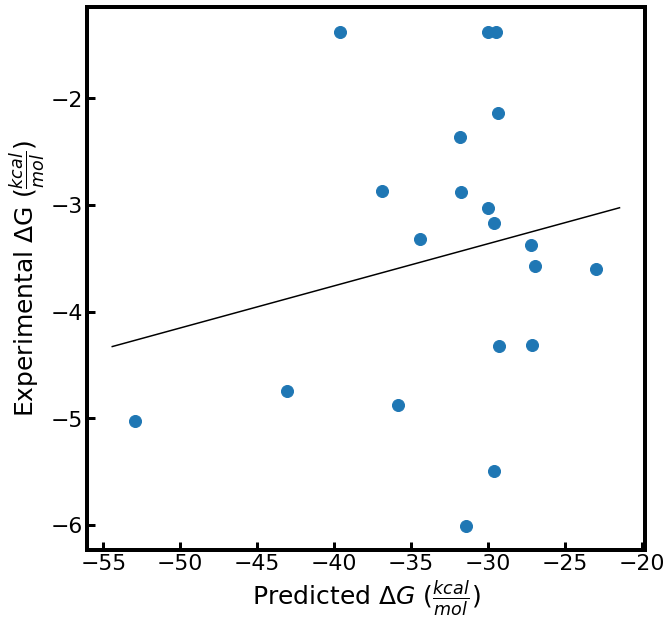

In [7]:
X=dF["Open dG"]
Y=dF["Exp dG"]

# Scatter plot
plt.scatter(X, Y, s=12**2, c='C0')
# Add correlation line
axes = plt.gca()
m, b = np.polyfit(X, Y, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-',color='k')
plt.xlabel(r'Predicted $\Delta G \ (\frac{kcal}{mol})$', fontsize=25)
plt.ylabel(r'Experimental $\Delta$G $(\frac{kcal}{mol})$', fontsize=25)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.tick_params(which='both',direction='in',length=8, width=3,)
# Save figure
#plt.savefig(graph_filepath, dpi=300, format='png', bbox_inches='tight')
#plt.savefig("../figs/corr-open.png", format='png', transparent=True, bbox_inches='tight')

#rmse_val = rmse(X, Y)
#print("RMSD is: " + str(rmse_val))

## PDE 2 GAF B Closed 

In [8]:
file="nucleo-closed.csv"
dH=pd.read_csv(file, header=0, sep=',')
dH.columns = ["Compound", "EC50"]

dH['Exp dG'] = dF['EC50'].apply(convertAffinity)

dH['Closed dG']=''
dG_total=[]
dG_list=[]
for k in range(15):
    tmp = dH['Compound'][k]
    cmpd = str(tmp)
    file="/home/chuck/u1/pde2/gafb/closed/mol2/nucleo/amber/"+tmp+"/pbsa/Results.dat"
    readFile = open(file, "r")
    for line in readFile:
        line = line.strip() # strip end-on-line
        if re.match(r"DELTA TOTAL", line):
            dG_total = line.split()
            dG_list.append(dG_total[2])
dH['Closed dG'] = dG_list
dH['Closed dG'] = pd.to_numeric(dH['Closed dG'])

In [9]:
X = sm.add_constant(dH["Closed dG"])
Y = dH["Exp dG"]

results = sm.OLS(Y,X.astype(float)).fit()
print(results.summary())

regr = linear_model.LinearRegression()
regr.fit(X,Y)
b = regr.intercept_
m = regr.coef_[1]
print('Y-Intercept: ', regr.intercept_)
print('Slope: ', regr.coef_)

                            OLS Regression Results                            
Dep. Variable:                 Exp dG   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     5.002
Date:                Thu, 07 Jul 2022   Prob (F-statistic):             0.0435
Time:                        13:14:26   Log-Likelihood:                -22.555
No. Observations:                  15   AIC:                             49.11
Df Residuals:                      13   BIC:                             50.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1937      5.253      1.560      0.1

/usr/local/lib64/python3.9/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


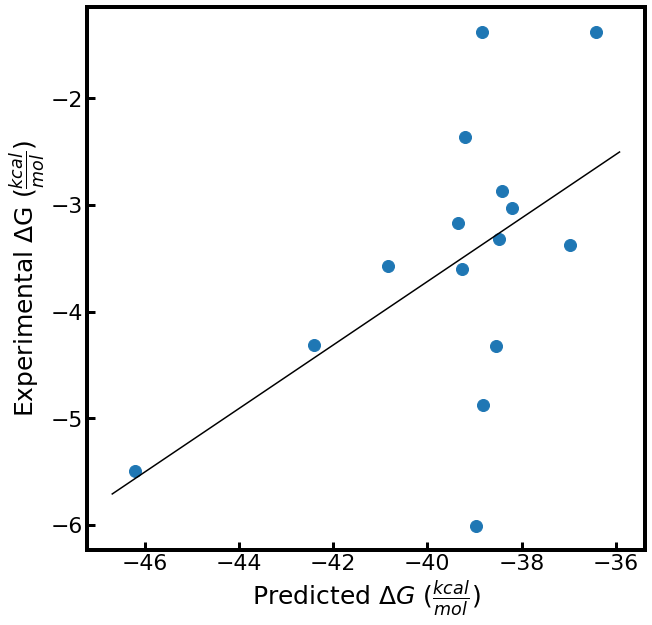

In [10]:
X=dH["Closed dG"]
Y=dH["Exp dG"]

# Scatter plot
plt.scatter(X, Y, s=12**2, c='C0')
# Add correlation line
axes = plt.gca()
m, b = np.polyfit(X, Y, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-',color='k')
plt.xlabel(r'Predicted $\Delta G \ (\frac{kcal}{mol})$', fontsize=25)
plt.ylabel(r'Experimental $\Delta$G $(\frac{kcal}{mol})$', fontsize=25)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.tick_params(which='both',direction='in',length=8, width=3,)
# Save figure
#plt.savefig(graph_filepath, dpi=300, format='png', bbox_inches='tight')
#plt.savefig("../figs/corr-closed.png", format='png', transparent=True, bbox_inches='tight')

#rmse_val = rmse(X, Y)
#print("RMSD is: " + str(rmse_val))

### Combine and take lowest value

In [11]:
combined=pd.merge(dF, dH, how='left', on='Compound')
combined=combined.drop(['EC50_y', 'Exp dG_y'], axis=1)
combined.columns=['Compound','EC50','Exp dG','Open dG','Closed dG']
combined['Closed dG2']=combined['Closed dG'] + 13.09
combined['Lowest dG'] = combined[['Open dG','Closed dG2']].min(axis=1)
combined.to_csv("/home/chuck/ipn/PDE2/gafb-corr.csv", index=False)

In [12]:
X = sm.add_constant(combined["Lowest dG"])
Y = combined["Exp dG"]

results = sm.OLS(Y,X.astype(float)).fit()
print(results.summary())

regr = linear_model.LinearRegression()
regr.fit(X,Y)
b = regr.intercept_
m = regr.coef_[1]
print('Y-Intercept: ', regr.intercept_)
print('Slope: ', regr.coef_)

                            OLS Regression Results                            
Dep. Variable:                 Exp dG   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.7746
Date:                Wed, 06 Jul 2022   Prob (F-statistic):              0.390
Time:                        21:55:07   Log-Likelihood:                -33.621
No. Observations:                  20   AIC:                             71.24
Df Residuals:                      18   BIC:                             73.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0714      1.607     -1.289      0.2

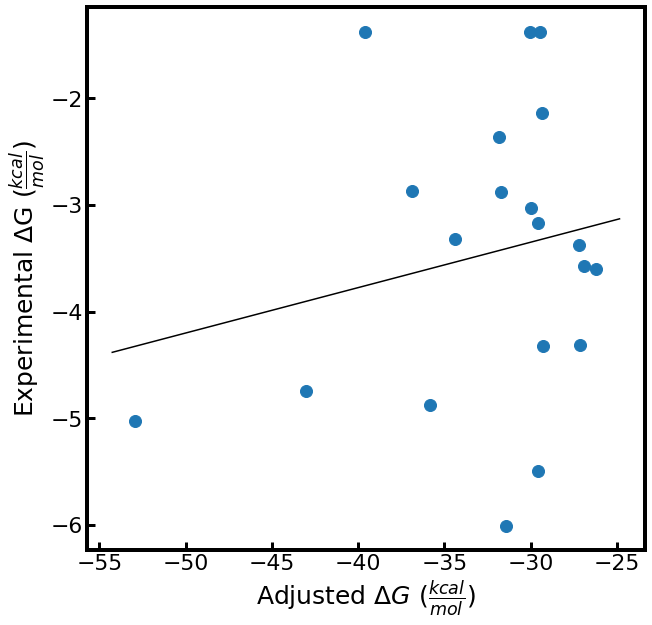

In [14]:
X=combined["Lowest dG"]
Y=combined["Exp dG"]

# Scatter plot
plt.scatter(X, Y, s=12**2, c='C0')
# Add correlation line
axes = plt.gca()
m, b = np.polyfit(X, Y, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-',color='k')
plt.xlabel(r'Adjusted $\Delta G \ (\frac{kcal}{mol})$', fontsize=25)
plt.ylabel(r'Experimental $\Delta$G $(\frac{kcal}{mol})$', fontsize=25)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.tick_params(which='both',direction='in',length=8, width=3,)
# Save figure
#plt.savefig(graph_filepath, dpi=300, format='png', bbox_inches='tight')
plt.savefig("../figs/corr-lower.png", format='png', transparent=True, bbox_inches='tight')

#rmse_val = rmse(X, Y)
#print("RMSD is: " + str(rmse_val))